In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('../../car_price_linear_regression/car_price.csv')

In [53]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Cleaning to make data consistent

In [54]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [55]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [56]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [57]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [58]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory data analysis

In [59]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<AxesSubplot:xlabel='msrp', ylabel='Count'>

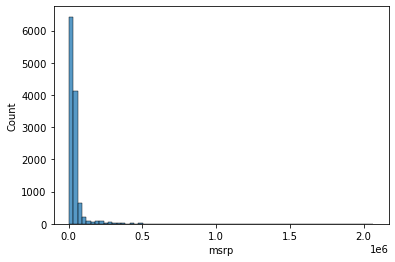

In [60]:
sns.histplot(df.msrp, bins=70)
# tail to the right which means data isn't normally distributed.
# Most cars are cheap, but there're some of them with high price
# to the right.
# + you can see that we have graph till 2.0 =>
# means there is at least one car with 2 million price

<AxesSubplot:xlabel='msrp', ylabel='Count'>

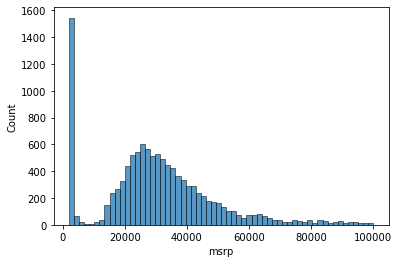

In [61]:
sns.histplot(df.msrp[df.msrp < 100000], bins=60)

In [62]:
# get rid of tail by applying log() which will diminish the large
# value.

np.log([1, 5, 20, 100, 1000])

array([0.        , 1.60943791, 2.99573227, 4.60517019, 6.90775528])

In [63]:
# But we can't apply log() to 0. => add 1 to every value
np.log([0 + 1, 1 + 1, 5 + 1, 20 + 1, 100 + 1, 1000 + 1])

array([0.        , 0.69314718, 1.79175947, 3.04452244, 4.61512052,
       6.90875478])

In [64]:
# log1p encompasses +1 action
np.log1p([0, 5, 10, 100, 5000])

array([0.        , 1.79175947, 2.39789527, 4.61512052, 8.51739317])

In [65]:
prices = np.log1p(df.msrp)
prices

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

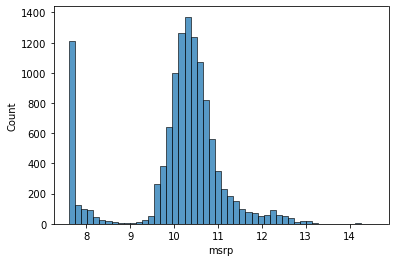

In [66]:
sns.histplot(prices, bins=50)
# all large figures are collapsed and all small figures
# are roughly the same.
# Bell-curve shape (normal distribution)

In [67]:
# look at missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up a validation framework

In [68]:
# 3 parts: train 60%, validation 20%, test 20%
len(df) * 0.2
# => use int() to round the number

2382.8

In [69]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [70]:
n, n_val + n_test + n_train
# data isn't the same due to rounding.

(11914, 11912)

In [71]:
# That's why take first, second and the REST is for training
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [72]:
# everything is good now
n, n_val + n_test + n_train

(11914, 11914)

In [73]:
df.iloc[1:4, :]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450


In [74]:
df_valid = df.iloc[:n_val]
df_test = df.iloc[n_val:n_test + n_val]
df_train = df.iloc[n_test + n_val:]

In [77]:
np.random.seed(2)

length = np.arange(n)
np.random.shuffle(length)
df_shuffle = df.iloc[length]

In [78]:
df_train = df_shuffle.iloc[:n_train].copy()
df_valid = df_shuffle.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffle.iloc[n_train + n_val:].copy()

In [80]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685


In [81]:
len(df_train), len(df_valid), len(df_test)

(7150, 2382, 2382)

In [82]:
# But if we want to have index of SHUFFLED data from 0 to n
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [83]:
df_valid.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650


In [84]:
y_train = np.log1p(df_train.msrp.values)
y_valid = np.log1p(df_valid.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [85]:
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']

# Linear regression

In [86]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [90]:
# makeshift feature matrix
xi = [453, 11, 86] # where i = 10
# engine_hp; city_mpg; popularity

In [100]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
# w0 if we don't know anything about the car.

# every engine_hp adds 0.01 to the price.
# If we have 453 hp => 453 * 0.01 => 4.53

In [101]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for i in range(n):
        pred += w[i] * xi[i]
    
    return np.expm1(pred)

In [102]:
linear_regression(xi)

222347.2221101062

In [105]:
def linear_regression(xi):
    return np.expm1(w0 + dot(xi, w))

def dot(xi, w):
    n = len(xi)
    
    result = 0
    for j in range(n):
        result += xi[j] * w[j]
    
    return result

In [106]:
linear_regression(xi)

222347.22211010658

In [112]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [115]:
def linear_regression(xi):
    new_xi = [1] + xi
    return np.expm1(dot(new_xi, w_new))

def dot(xi, w):
    n = len(xi)
    
    result = 0
    for j in range(n):
        result += xi[j] * w[j]
    
    return result

In [116]:
linear_regression(xi)

222347.2221101062

In [118]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = np.array([x1, x2, x3])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [120]:
def linear_regression(X):
    return X.dot(w_new)

In [121]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model